In [4]:
import pandas as pd
import json
import sqlite3
import csv
from matplotlib import pyplot as plt

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [5]:
tree_census = pd.read_csv('2015StreetTreesCensus_TREES.csv.crdownload')
tree_census

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375.0,Forest Hills,406.0,4.0,Queens,29.0,28.0,16.0,QN17,Forest Hills,4073900.0,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357.0,Whitestone,407.0,4.0,Queens,19.0,27.0,11.0,QN49,Whitestone,4097300.0,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211.0,Brooklyn,301.0,3.0,Brooklyn,34.0,50.0,18.0,BK90,East Williamsburg,3044900.0,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211.0,Brooklyn,301.0,3.0,Brooklyn,34.0,53.0,18.0,BK90,East Williamsburg,3044900.0,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215.0,Brooklyn,306.0,3.0,Brooklyn,39.0,44.0,21.0,BK37,Park Slope-Gowanus,3016500.0,New York,40.666778,-73.975979,9.909138e+05,182202.425999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387487,05/12/2016,558113,324749,POINT (-73.79383086639491 40.67250699240243),43,0,OnCurb,Alive,Fair,Platanus x acerifolia,London planetree,None,None,NoDamage,TreesCount Staff,TrunkOther,No,No,No,No,No,Yes,No,No,No,126-037 145 STREET,11436.0,Jamaica,412.0,4.0,Queens,28.0,32.0,10.0,QN76,Baisley Park,4079000.0,New York,40.672507,-73.793831,1.041440e+06,184356.137571
387488,06/28/2016,606381,328682,POINT (-73.76755137231018 40.7025185028443),34,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,187-045 HILBURN AVENUE,11412.0,Saint Albans,412.0,4.0,Queens,27.0,29.0,14.0,QN08,St. Albans,4040400.0,New York,40.702518,-73.767551,1.048701e+06,195308.418488
387489,06/29/2016,607851,333372,POINT (-73.73338731819271 40.70248716012277),13,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,223-023 113 DRIVE,11429.0,Queens Village,413.0,4.0,Queens,27.0,33.0,14.0,QN33,Cambria Heights,4059200.0,New York,40.702487,-73.733387,1.058174e+06,195323.983418
387490,07/03/2016,612895,348150,POINT (-73.84589505110111 40.7145389966025),13,0,OnCurb,Alive,Good,Fraxinus,ash,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,71-053 HARROW STREET,11375.0,Forest Hills,406.0,4.0,Queens,29.0,28.0,15.0,QN17,Forest Hills,4072300.0,New York,40.714539,-73.845895,1.026971e+06,199639.911137


In [6]:
#Display the categories from the data
tree_census.columns

Index(['created_at', 'tree_id', 'block_id', 'the_geom', 'tree_dbh',
       'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trnk_wire', 'trnk_light', 'trnk_other',
       'brnch_ligh', 'brnch_shoe', 'brnch_othe', 'address', 'zipcode',
       'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem',
       'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'Latitude',
       'longitude', 'x_sp', 'y_sp'],
      dtype='object')

In [7]:
#Remove data you don't want without deleting it by creating a new variable with only the columns you want.
tree_census_subset=tree_census[['tree_id','tree_dbh',
       'curb_loc', 'stump_diam', 'status', 'health', 'spc_latin', 'spc_common',
       'user_type', 'problems','address',
       'zip_city', 'state',]]
tree_census_subset

,tree_id,tree_dbh,curb_loc,stump_diam,status,health,spc_latin,spc_common,user_type,problems,address,zip_city,state
0,180683,3,OnCurb,0,Alive,Fair,Acer rubrum,red maple,TreesCount Staff,None,108-005 70 AVENUE,Forest Hills,New York
1,200540,21,OnCurb,0,Alive,Fair,Quercus palustris,pin oak,TreesCount Staff,Stones,147-074 7 AVENUE,Whitestone,New York
2,204026,3,OnCurb,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,Volunteer,None,390 MORGAN AVENUE,Brooklyn,New York
3,204337,10,OnCurb,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,Volunteer,Stones,1027 GRAND STREET,Brooklyn,New York
4,189565,21,OnCurb,0,Alive,Good,Tilia americana,American linden,Volunteer,Stones,603 6 STREET,Brooklyn,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387487,558113,43,OnCurb,0,Alive,Fair,Platanus x acerifolia,London planetree,TreesCount Staff,TrunkOther,126-037 145 STREET,Jamaica,New York
387488,606381,34,OnCurb,0,Alive,Good,Platanus x acerifolia,London planetree,TreesCount Staff,None,187-045 HILBURN AVENUE,Saint Albans,New York
387489,607851,13,OnCurb,0,Alive,Good,Platanus x acerifolia,London planetree,TreesCount Staff,Stones,223-023 113 DRIVE,Queens Village,New York
387490,612895,13,OnCurb,0,Alive,Good,Fraxinus,ash,Volunteer,None,71-053 HARROW STREET,Forest Hills,New York


In [53]:
#delete certain columns all together
new_tree_census = tree_census.drop(['steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trnk_wire', 'trnk_light', 'trnk_other',
       'brnch_ligh', 'brnch_shoe', 'brnch_othe', 'address', 'zipcode',
       'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem',
       'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'Latitude',
       'longitude', 'x_sp', 'y_sp'], axis=1)
new_tree_census

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,red maple
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,American linden
...,...,...,...,...,...,...,...,...,...,...,...
387487,05/12/2016,558113,324749,POINT (-73.79383086639491 40.67250699240243),43,0,OnCurb,Alive,Fair,Platanus x acerifolia,London planetree
387488,06/28/2016,606381,328682,POINT (-73.76755137231018 40.7025185028443),34,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree
387489,06/29/2016,607851,333372,POINT (-73.73338731819271 40.70248716012277),13,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree
387490,07/03/2016,612895,348150,POINT (-73.84589505110111 40.7145389966025),13,0,OnCurb,Alive,Good,Fraxinus,ash


In [54]:
#Delete duplicates from a specific row

new = tree_census_subset.drop_duplicates(subset="spc_latin")
new

,tree_id,tree_dbh,curb_loc,stump_diam,status,health,spc_latin,spc_common,user_type,problems,address,zip_city,state
0,180683,3,OnCurb,0,Alive,Fair,Acer rubrum,red maple,TreesCount Staff,None,108-005 70 AVENUE,Forest Hills,New York
1,200540,21,OnCurb,0,Alive,Fair,Quercus palustris,pin oak,TreesCount Staff,Stones,147-074 7 AVENUE,Whitestone,New York
2,204026,3,OnCurb,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,Volunteer,None,390 MORGAN AVENUE,Brooklyn,New York
4,189565,21,OnCurb,0,Alive,Good,Tilia americana,American linden,Volunteer,Stones,603 6 STREET,Brooklyn,New York
9,192755,21,OffsetFromCurb,0,Alive,Fair,Platanus x acerifolia,London planetree,TreesCount Staff,None,638 AVENUE Z,Brooklyn,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58137,136662,10,OnCurb,0,Alive,Good,Pinus virginiana,Virginia pine,Volunteer,Stones,55 AVENUE A,New York,New York
122217,2191,8,OnCurb,0,Alive,Good,Cornus alternifolia,pagoda dogwood,TreesCount Staff,"RootOther,WiresRope,BranchLights",1303 ARDEN AVENUE,Staten Island,New York
122220,36585,6,OnCurb,0,Alive,Good,Carpinus japonica,Japanese hornbeam,Volunteer,Stones,115 WEST 117 STREET,New York,New York
122222,67278,2,OnCurb,0,Alive,Fair,Pinus,pine,Volunteer,None,517 WEST 147 STREET,New York,New York


In [55]:
#total amount of null values in each category
tree_census_subset.isna().sum()

tree_id           0
tree_dbh          0
curb_loc          0
stump_diam        0
status            0
health        18093
spc_latin     18092
spc_common    18092
user_type         0
problems      18113
address           0
zip_city          1
state             1
dtype: int64

In [56]:
tree_census_subset.describe()

,tree_id,tree_dbh,stump_diam
count,387492.000000,387492.000000,387492.000000
mean,384164.384700,11.009693,0.438399
std,121301.265893,8.668273,3.302489
min,7.000000,0.000000,0.000000
25%,282977.750000,4.000000,0.000000
50%,384663.500000,9.000000,0.000000
75%,486417.250000,15.000000,0.000000
max,640157.000000,450.000000,140.000000


In [57]:
#Use to see the type of each category
tree_census_subset.dtypes

tree_id        int64
tree_dbh       int64
curb_loc      object
stump_diam     int64
status        object
health        object
spc_latin     object
spc_common    object
user_type     object
problems      object
address       object
zip_city      object
state         object
dtype: object

In [58]:
#Way to display the amount of data for each value of a category
tree_census_subset['status'].value_counts()

Alive    369400
Stump     10255
Dead       7837
Name: status, dtype: int64

In [59]:
#Create a variable to store one type of data from a category
stumps = tree_census_subset[tree_census_subset['status']=='Stump']
stumps

,tree_id,tree_dbh,curb_loc,stump_diam,status,health,spc_latin,spc_common,user_type,problems,address,zip_city,state
307,208525,0,OnCurb,9,Stump,NaN,NaN,NaN,Volunteer,NaN,424 WEST 51 STREET,New York,New York
494,176343,0,OnCurb,17,Stump,NaN,NaN,NaN,TreesCount Staff,NaN,2010 NEWKIRK AVENUE,Brooklyn,New York
598,239221,0,OnCurb,16,Stump,NaN,NaN,NaN,Volunteer,NaN,1679 11 AVENUE,Brooklyn,New York
619,208246,0,OffsetFromCurb,6,Stump,NaN,NaN,NaN,Volunteer,NaN,15 WEST 81 STREET,New York,New York
640,179766,0,OnCurb,30,Stump,NaN,NaN,NaN,TreesCount Staff,NaN,2676 BEDFORD AVENUE,Brooklyn,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387186,608428,0,OnCurb,24,Stump,NaN,NaN,NaN,Volunteer,NaN,87-020 86 STREET,Woodhaven,New York
387217,605566,0,OnCurb,14,Stump,NaN,NaN,NaN,TreesCount Staff,NaN,162-029 73 AVENUE,Fresh Meadows,New York
387224,587000,0,OnCurb,5,Stump,NaN,NaN,NaN,Volunteer,NaN,58-031 81 STREET,Middle Village,New York
387225,572106,0,OnCurb,53,Stump,NaN,NaN,NaN,TreesCount Staff,NaN,243-001 131 ROAD,Rosedale,New York


array([[<AxesSubplot: title={'center': 'tree_id'}>,
        <AxesSubplot: title={'center': 'tree_dbh'}>],
       [<AxesSubplot: title={'center': 'stump_diam'}>, <AxesSubplot: >]],
      dtype=object)

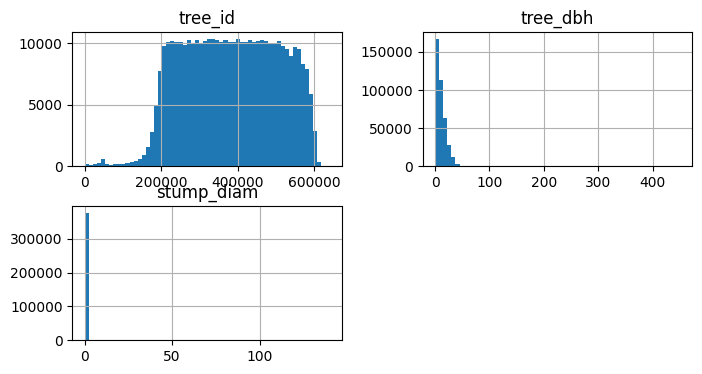

In [60]:
#Graph out the data
tree_census_subset.hist(bins=60, figsize=(8,4))

<AxesSubplot: xlabel='tree_id', ylabel='tree_dbh'>

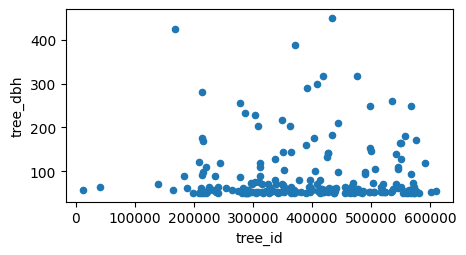

In [61]:
#grav only a certain amount of data
big_trees = tree_census_subset[tree_census_subset['tree_dbh']>50]

#create a scatter plot
big_trees[['tree_id', 'tree_dbh']].plot(kind='scatter', x='tree_id', y='tree_dbh', figsize=(5,2.5))

In [ ]:
#Save new data to file
city_data.to_json("ResterauntData.json")